# Loading Portfolio data

The `src/portfolio_analysis.py` file contains functions for predefined analyses, however, you can still using the `StockPriceLoader` and `CalculateStockValue` classes directly to load the raw data to do your own independant analysis.

Everyone's portfolio is unique and everyone has slightly different requirements for their analysis. Therefore, you may even want to fork this repository, use the dataloading functions but then adapt for your needs. 

This notebook will give an overview of how to load data from an input data source.

In [1]:
%load_ext autoreload
%autoreload 2

# !pip install nb_black
%load_ext nb_black

&lt;IPython.core.display.Javascript object&gt;

In [2]:
import sys
sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [3]:
import pandas as pd
import ffn

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from src.data_loader import StockPriceLoader
from src.data_loader import BenchMarkLoader
from src.portfolio_value import CalculateStockValue
from src.portfolio_value import Portfolio

&lt;IPython.core.display.Javascript object&gt;

## Input data format

The required data input for this analysis is a `csv` file containing rows for each purchase (or disposal) of a stock in your portfolio. An example is given in the `../data/raw/purchase_info.csv` in this repository.

The required columns are:
- `date`: the date of your transaction
- `action`: BUY or SELL
- `company`: the name of the company (this is not sensitive to any further analysis and can be anything of your choosing)
- `yahoo_ticker`: the ticker of the stock on finance.yahoo.com (note this might be different from the actual stock market ticker)
- `currency`: the currency the stock price is denominated in
- `num_shares`: the number of shares involved in the transaction
- `stock_price_usd`: the stock price you bought the stock at on that day
- `trading_costs_usd`: the trading costs incurred
- `total_usd`: the total cost of the transaction
- `total_shares_held`: the total number of shares held after the transaction

In [4]:
pd.read_csv("../data/raw/purchase_info.csv")

,date,action,company,yahoo_ticker,currency,num_shares,stock_price_usd,trading_costs_usd,total_usd,total_shares_held
0,17/07/2019,CASH IN,cash,cash,USD,0,100000.0000,0.00,100000.00,0
1,17/07/2019,BUY,Intel,INTC,USD,180,49.9100,4.95,8988.75,180
2,17/07/2019,BUY,Applied Materials,AMAT,USD,268,45.9151,4.95,12310.20,268
3,17/07/2019,BUY,MKS Instruments,MKSI,USD,120,76.7449,4.95,9214.34,120
4,17/07/2019,BUY,Synopsys,SNPS,USD,68,136.8084,4.95,9307.92,68
5,17/07/2019,BUY,SOXX ETF,SOXX,USD,75,204.2607,4.95,15324.50,75
6,18/07/2019,BUY,Nvidia,NVDA,USD,39,166.6700,4.95,6505.08,39
7,26/11/2019,SELL,Nvidia,NVDA,USD,5,217.0000,4.95,1089.95,34
8,25/12/2019,CASH IN,cash,cash,USD,0,10000.0000,0.00,10000.00,0
9,25/03/2020,BUY,Nvidia,NVDA,USD,10,205.7500,4.95,2062.45,44


&lt;IPython.core.display.Javascript object&gt;

## Load Stock Prices

You are able to load a dataframe of daily closing stock prices for all stock tickers present in the `purchase_info.csv`, starting from the earliest date of your first position, using the `StockPriceLoader` class.

Note the default location for the input data file is: `../data/raw/purchase_info.csv`, however, you can specify your own location using the `input_data_source` argument.

The `StockPriceLoader` class uses the `ffn` library to load the stock prices for free from Yahoo ([see ffn library for more details](https://pmorissette.github.io/ffn/)).

In [5]:
# load stock prices of tickers in your purchase_info csv file
prices = StockPriceLoader()

&lt;IPython.core.display.Javascript object&gt;

In [6]:
# __repr__ gives a list of tickers and the starting date
prices

Tickers: [&#39;INTC&#39;, &#39;AMAT&#39;, &#39;MKSI&#39;, &#39;SNPS&#39;, &#39;SOXX&#39;, &#39;NVDA&#39;]
Start Date: 2019-07-17 00:00:00

&lt;IPython.core.display.Javascript object&gt;

In [7]:
# show stock prices
prices.daily_stock_prices.head(10)

,INTC,AMAT,MKSI,SNPS,SOXX,NVDA
2019-07-17,47.952766,45.377625,77.286873,135.750000,201.027237,169.188049
2019-07-18,48.486755,47.292084,79.584183,136.039993,203.936676,169.656601
2019-07-19,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951
2019-07-20,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951
2019-07-21,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951
2019-07-22,49.855732,49.805428,82.247879,135.419998,207.593140,170.793091
2019-07-23,50.244091,50.099960,83.960953,136.160004,210.256882,175.119736
2019-07-24,51.380039,51.189732,88.664520,137.619995,216.665527,178.110519
2019-07-25,50.642159,49.893784,85.703758,137.500000,213.028702,172.846756
2019-07-26,50.088745,49.815247,86.713776,137.089996,212.969757,174.531570


&lt;IPython.core.display.Javascript object&gt;

This can be used at the very basic level to analyse the general performance of each stock (regardless of your position)

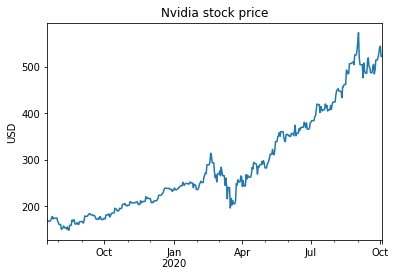

&lt;IPython.core.display.Javascript object&gt;

In [8]:
prices.daily_stock_prices['NVDA'].plot()
plt.title("Nvidia stock price")
plt.ylabel("USD")
plt.show()


## Individual Stock Position Analysis

You can use the `CalculateStockValue` class in `src/portfolio_value.py` to calculate, for any individual stock in the input data csv, the daily number of shares owned and the USD value of the holding at any date since the first purchase.

The `CalculateStockValue` class inherits from the `StockPriceLoader` class so you don't need to reload all the stock prices - all you need to provide is a ticker [and input_data_source path (optional)].

The class will create an object with all of the same attributes as the `StockPriceLoader`, but will also have the following additional stock specific attributes:
- `stock_purchase_info`: the buy/sell actions for the specific stock
- `daily_stock_price`: the daily stock price for the stock
- `metadata`: the company name, ticker and currency for the stock
- `daily_shares_owned`: timeseries with the daily number of shares owned for the stock
- `daily_value_usd`: timeseries with the overall USD value of your current holding for the stock

An example is given below for Nvidia:

In [9]:
example_ticker = 'NVDA'

# automatically loads purchase info from ../data/raw/purchase_info.csv, however, you can specify your own file name and location
nvda_stock_value = CalculateStockValue(ticker='NVDA')

#list available properties
for key in vars(nvda_stock_value):
    print(key)

# example: list all purchases/disposals for nvda
display(nvda_stock_value.stock_purchase_info)

input_data_source
tickers
start_date
positions
datetime_index
daily_stock_prices
stock_purchase_info
daily_stock_price
metadata
daily_shares_owned
daily_value_usd


,date,action,company,yahoo_ticker,currency,num_shares,stock_price_usd,trading_costs_usd,total_usd,total_shares_held
6,2019-07-18,BUY,Nvidia,NVDA,USD,39,166.67,4.95,6505.08,39
7,2019-11-26,SELL,Nvidia,NVDA,USD,5,217.00,4.95,1089.95,34
9,2020-03-25,BUY,Nvidia,NVDA,USD,10,205.75,4.95,2062.45,44


&lt;IPython.core.display.Javascript object&gt;

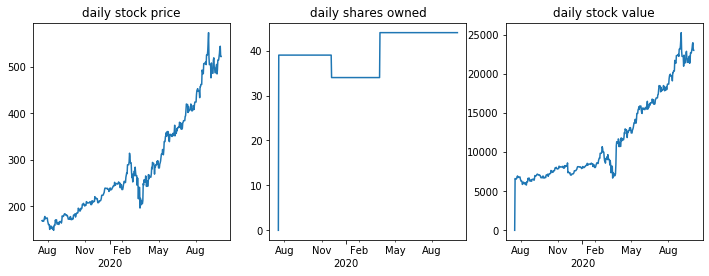

&lt;IPython.core.display.Javascript object&gt;

In [10]:
# plot stock price, number of shares owned and USD value of the position overtime
years= mdates.YearLocator()
yearsFmt = mdates.DateFormatter('\n%Y')
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%b') 

plot_properties = [nvda_stock_value.daily_stock_price,nvda_stock_value.daily_shares_owned, nvda_stock_value.daily_value_usd]
plot_titles = ['daily stock price', 'daily shares owned','daily stock value']
_, axs = plt.subplots(ncols=3,figsize=(12,4))
for i, (property, title) in enumerate(zip(plot_properties,plot_titles)):
    axs[i].plot(property)
    axs[i].xaxis.set_minor_locator(months)
    axs[i].xaxis.set_minor_formatter(monthsFmt)
    axs[i].xaxis.set_major_locator(years)
    axs[i].xaxis.set_major_formatter(yearsFmt)

    axs[i].set_title(title)

plt.show()


**Portfolio Class**

The `Portfolio` class provides a wrapper for the data loading shown above to abstract away from having to load the individual stock data.

Initiating a `Portfolio` object will load all the necessary stock prices and calculate the overall portfolio value and statistics. Note that it inherits from the `StockPriceLoader` and `CalculateStockValue` classes so you will still have direct access to individual stock info if required.

In [11]:
# default data source is '../data/raw/purchase_info.csv'
pf = Portfolio()

&lt;IPython.core.display.Javascript object&gt;

In [12]:
# you can access individual stock info using the 'stock_objects' attribute
#example: access 'NVDA' purchase info as also demonstrated above
pf.stock_objects['NVDA'].stock_purchase_info


,date,action,company,yahoo_ticker,currency,num_shares,stock_price_usd,trading_costs_usd,total_usd,total_shares_held
6,2019-07-18,BUY,Nvidia,NVDA,USD,39,166.67,4.95,6505.08,39
7,2019-11-26,SELL,Nvidia,NVDA,USD,5,217.00,4.95,1089.95,34
9,2020-03-25,BUY,Nvidia,NVDA,USD,10,205.75,4.95,2062.45,44


&lt;IPython.core.display.Javascript object&gt;

In [13]:
# combined daily value = USD position of each stock over time
pf.combined_daily_value

,INTC,AMAT,MKSI,SNPS,SOXX,NVDA,cash_balance
date,,,,,,,
2019-07-17,8631.497955,12161.203369,9274.424744,9231.000000,15077.042770,0.000000,44854.29
2019-07-18,8727.615967,12674.278442,9550.101929,9250.719543,15295.250702,6616.607437,38349.21
2019-07-19,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280,6548.956100,38349.21
2019-07-20,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280,6548.956100,38349.21
2019-07-21,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280,6548.956100,38349.21
...,...,...,...,...,...,...,...
2020-09-29,9214.199753,15986.200409,13288.799744,14437.760498,22806.749725,23277.321289,42376.71
2020-09-30,9320.399780,15932.600204,13107.600403,14550.639709,22845.748901,23813.678711,42376.71
2020-10-01,9403.200302,16254.200409,13377.600403,14762.119751,23334.750366,23961.520752,42376.71


&lt;IPython.core.display.Javascript object&gt;

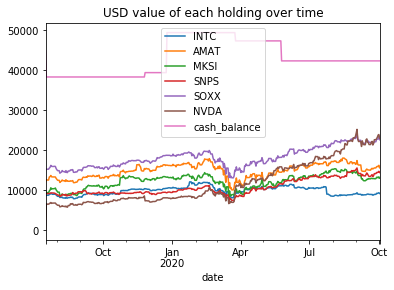

&lt;IPython.core.display.Javascript object&gt;

In [14]:
pf.combined_daily_value.plot()
plt.title("USD value of each holding over time")
plt.show()

# Cash Balance

The daily cash balance of the portfolio is calculated from the input data source...

//TODO 

In [15]:
from src.portfolio_value import CalculateCashBalance

&lt;IPython.core.display.Javascript object&gt;

In [16]:
cash = CalculateCashBalance()

&lt;IPython.core.display.Javascript object&gt;

In [17]:
cash.cash_flows

,inflows,outflows,pf_cash_increase,pf_cash_decrease,cash_balance_change,pf_cash_balance,external_cashflows
date,,,,,,,
2019-07-17,100000.0,0.0,0.0,55145.71,44854.29,44854.29,100000.0
2019-07-18,0.0,0.0,0.0,6505.08,-6505.08,38349.21,100000.0
2019-07-19,0.0,0.0,0.0,0.00,0.00,38349.21,100000.0
2019-07-20,0.0,0.0,0.0,0.00,0.00,38349.21,100000.0
2019-07-21,0.0,0.0,0.0,0.00,0.00,38349.21,100000.0
...,...,...,...,...,...,...,...
2020-09-29,0.0,0.0,0.0,0.00,0.00,42376.71,105000.0
2020-09-30,0.0,0.0,0.0,0.00,0.00,42376.71,105000.0
2020-10-01,0.0,0.0,0.0,0.00,0.00,42376.71,105000.0


&lt;IPython.core.display.Javascript object&gt;

## Benchmarks

Sometimes you will want to benchmark your portfolio against indices or other instruments.

The `BenchMarkLoader` class will load the stock prices for any stocks/indices you which to compare your portfolio to.

The input for the object is a initiated `Portfolio` object (the `BenchMarkLoader` class will inherit various properties from this class e.g. start_date) and the list of benchmarks to load. A single benchmark can be passed as a string or a list of benchmarks can be passed to the function.

In [18]:
# load SNP 500 
benchmark = '^GSPC'
bm = BenchMarkLoader(pf,benchmark_tickers=benchmark)
bm.benchmark_stock_prices

,^GSPC
2019-07-17,2984.419922
2019-07-18,2995.110107
2019-07-19,2976.610107
2019-07-20,2976.610107
2019-07-21,2976.610107
...,...
2020-09-29,3335.469971
2020-09-30,3363.000000
2020-10-01,3380.800049
2020-10-02,3348.419922


&lt;IPython.core.display.Javascript object&gt;

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7feb00270d10&gt;

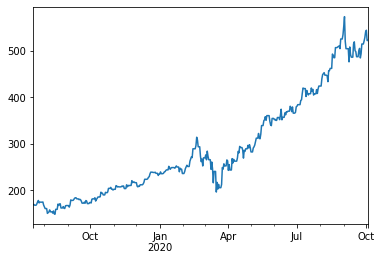

&lt;IPython.core.display.Javascript object&gt;

In [21]:
pf.stock_objects['NVDA'].daily_stock_price.plot()